In [1]:
# Generate phase screen given different models
function phase_screen_gen(turb_model,C2n, L0, l0, kk)
    if turb_model == "kolmogorov"
        power_spectrum = kolmogorov_psd(C2n, L0, l0, kk)
#     elseif turb_model == "random"
#     elseif turb_model == "vonKarman"
#     elseif turb_model == "modAtm"
    end
end
    

phase_screen_gen (generic function with 1 method)

In [2]:
function kolmogorov_psd(C2n,L0,l0,k)
    Kolm_Phi = 0.033*C2n*k^(-11/3)
    return Kolm_Phi
end

kolmogorov_psd (generic function with 1 method)

In [ ]:
turb_model = "kolmogorov"
phase_screen_gen(turb_model)

In [3]:
function gen_gauss_beam(nx,ny,dx,dy,z,W_0,A_0,F_0,lambda)
    k = 2*pi/lambda
    Theta_0 = 1-z/F_0
    Amp_0 = 2*z/(k*W_0^2)
    W = W_0*sqrt(Theta_0^2 + Amp_0^2)
    F = (F_0*(Theta_0^2 + Amp_0^2)*(Theta_0 - 1))/(Theta_0^2 + Amp_0^2 - Theta_0)
    x_r = (1:nx)*dx
    y_r = (1:ny)*dy
    E = zeros(Complex{Float64}, nx, ny)
    E_max = Float64[]
    for ii in 1:nx
        for jj in 1:ny
            #x = ii*dx
            #y = jj*dy
            x = (ii - (nx + 1) / 2) * dx  # Centering x
            y = (jj - (ny + 1) / 2) * dy  # Centering y
            r = (x^2 + y^2)^0.5
#             E[ii,jj] = (A_0/sqrt(Theta_0^2 + Amp_0^2))*exp(-(r^2)/W^2)*exp(im*k*z-im*atan(Amp_0/Theta_0)-(im*k*r^2/2*F))
            E[ii,jj] = (A_0*exp(-r^2/W_0^2)*exp(-im*k*r^2/(2*F_0)))
        end
    end
    #p = heatmap(1:nx, 1:ny, Array(real(E*conj(E)))',aspect_ratio=1, c=:viridis, xlims=(200,300), ylims=(200,300), xlabel="nx",  ylabel="ny",title="Intensity, z= " * string(z) * "m")
    #display(plot(p))
    return E
end

gen_gauss_beam (generic function with 1 method)

In [ ]:
using Plots
z = 0
nx = 500
ny = 500
dx = 1e-3
dy = 1e-3
W_0 = 0.03
F_0 = 500
A_0 = 5e8
lambda = 6.33e-7
E_max = Float64[]
E = (gen_gauss_beam(nx,ny,dx,dy,z,W_0,A_0,F_0,lambda))



In [ ]:
C2n = 10^(-20)
L0  = 10
l0  = 0.001
kk   = 2*pi/6e9
using Pkg
Pkg.add("FFTW")
using FFTW
power_spectrum = kolmogorov_psd(C2n, L0, l0, kk)
phase_spectrum = sqrt(power_spectrum) .* exp(1*im*2*pi*rand(nx, ny))
phase_screen = ifft(ifft(fftshift(phase_spectrum), 1),2)

#heatmap(1:nx,1:ny,phase_screen^2)

In [ ]:
B= real(phase_screen.*(conj(phase_screen)))
heatmap(1:nx,1:ny,B)

In [ ]:
E_d = E_new .* phase_screen;
C = conj(E_d)
println(maximum(real(E_d.*C)))
heatmap(1:nx,1:ny,real(E_d))

In [4]:
function fresnel_prop(E_0,lambda,z) #Convolution
    k = 2*pi/lambda
    E_new = zeros(Complex{Float64}, nx, ny)
    h = zeros(Complex{Float64}, nx, ny)
    for ii in 1:nx
        for jj in 1:ny
            x = (ii - (nx + 1) / 2) * dx  # Centering x
            y = (jj - (ny + 1) / 2) * dy  # Centering y
            h[ii,jj]= (exp(im*k*z)/(im*lambda*z))*exp((im*k/2*z)*(x^2+y^2))
            E_new[ii,jj] = (E_0[ii,jj] .* h[ii,jj])
        end
    end
    println(maximum(real(E_new)))
    return E_new
            
end
    

fresnel_prop (generic function with 1 method)

In [ ]:
z = 0.01
E_new = fresnel_prop(E,lambda,z)

In [ ]:
    p2 = heatmap(1:nx, 1:ny, Array(real(E_new))',aspect_ratio=1, c=:viridis, xlims=(200,300), ylims=(200,300), xlabel="nx",  ylabel="ny",title="Amplitude of Electric Field of Gaussian Beam, z= " * string(z) * "m")
    display(plot(p2))

Animation directory: ./test/
1.532806228086394e15
1.5379511074792485e15


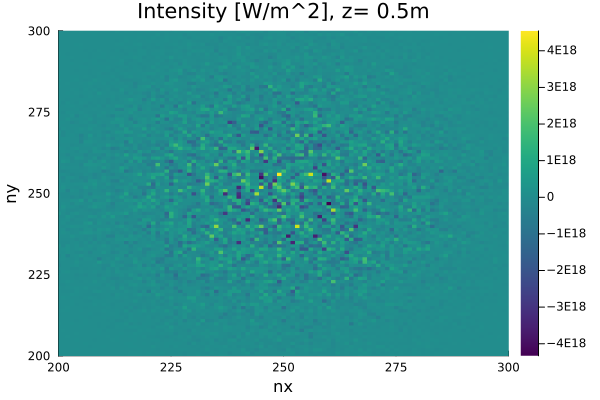

7.798229834091986e14
7.747509314746854e14


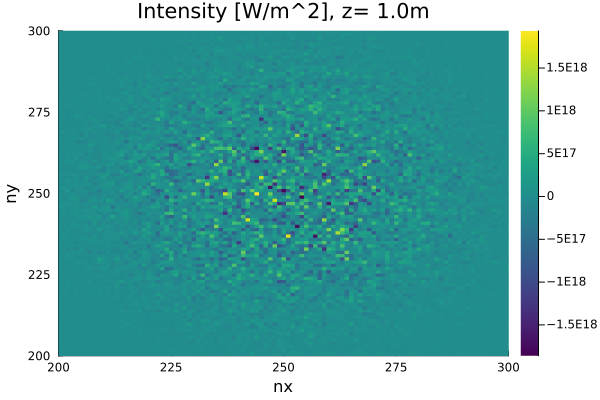

5.105196671539242e14
5.1932804615564075e14


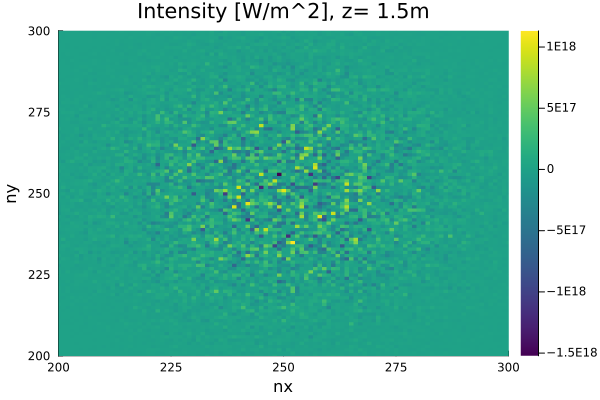

3.7728676716133656e14
3.912038709429866e14


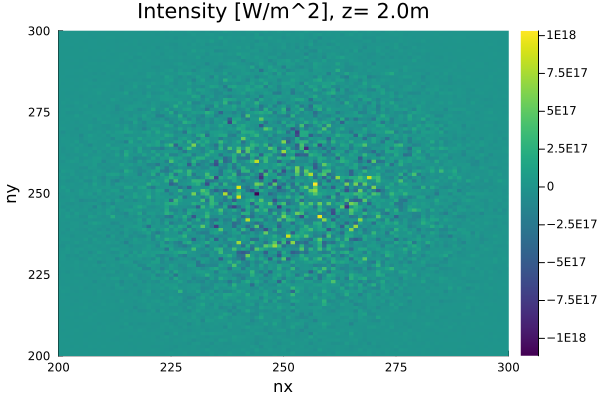

In [11]:
# Initialized Gaussian Beam
using Plots
using DataFrames
using FFTW
z = 0
nx = 500
ny = 500
dx = 1e-3
dy = 1e-3
W_0 = 0.03
F_0 = 500
A_0 = 5e8
lambda = 6.33e-7
E = (gen_gauss_beam(nx,ny,dx,dy,z,W_0,A_0,F_0,lambda))
# Phase screen method, repeat for n number of phase screens determined by L
C2n = 10^(-20)
L0  = 10
l0  = 0.5
kk   = 2*pi/6e9
L = 2 # m
ps_step = (L/l0)
power_spectrum = kolmogorov_psd(C2n, L0, l0, kk)
rand_field = randn(nx, ny) + 1*im*randn(nx, ny)
phase_spectrum = sqrt(power_spectrum) .* rand_field
phase_screen = real(ifft(ifft(fftshift(phase_spectrum), 1),2))
I_d = E.*conj(E)
if isdir("test")==false mkdir("test") end; loadpath = "./" * "test" * "/"; anim = Animation(loadpath,String[])
    println("Animation directory: $(anim.dir)")
# default(size=(800,800))
# hp = heatmap(1:nx,1:ny,real(E_d.*conj(E_d)),xlabel="nx", c=:viridis, xlims=(200,300), ylims=(200,300), colorbar_size=20, ylabel="ny",title="Intensity, z= " * string(0) * "m")
# display(plot(hp))
# frame(anim);
    for pp in 1:ps_step
        ps_x = pp*l0
        E_new = fresnel_prop(E,lambda,ps_x)
        println(maximum(real(E_new.* exp.(im * phase_screen))))

#        hp = heatmap(1:nx,1:ny,real(E_new),xlabel="nx", c=:viridis, xlims=(200,300), ylims=(200,300), colorbar_size=20, right_margin = 6Plots.mm, ylabel="ny",title="Intensity [W/m^2], z= " * string(ps_x) * "m")
#        display(plot(hp))
#         hp = heatmap(1:nx,1:ny,real(E_new),xlabel="nx", c=:viridis, xlims=(200,300), ylims=(200,300), colorbar_size=20, right_margin = 6Plots.mm, ylabel="ny",title="Intensity [W/m^2], z= " * string(ps_x) * "m")
#         display(plot(hp))
#         default(size=(600,600))
#         hp = heatmap(1:nx,1:ny,real(I_d),xlabel="nx", c=:viridis, xlims=(200,300), ylims=(200,300), colorbar_size=20, right_margin = 6Plots.mm, ylabel="ny",title="Intensity [W/m^2], z= " * string(ps_x) * "m")
#         display(plot(hp))
#         frame(anim);
#         # Apply Phase screen
        # E_d = E_new 
#         #.* phase_screen;
#         C = conj(E_d)
#         I_d = E_d.*C
        hp = heatmap(1:nx,1:ny,real(E_new.*phase_screen),xlabel="nx", c=:viridis, xlims=(200,300), ylims=(200,300), colorbar_size=20, right_margin = 6Plots.mm, ylabel="ny",title="Intensity [W/m^2], z= " * string(ps_x) * "m")
         display(plot(hp))

    end
#     fnm_gif = "test.gif"
#     gif(anim, fnm_gif, fps = 2)


In [ ]:
    zs = 0.1:0.1:0.5
    k = 2*pi/lambda
    h = zeros(Complex{Float64}, nx, ny)
E_t2 = zeros(Complex{Float64}, nx, ny)
z = []
for z in zs
    for ii = 1:nx
        for jj in 1:ny
            x = (ii - (nx + 1) / 2) * dx  # Centering x
            y = (jj - (ny + 1) / 2) * dy  # Centering y
            h[ii,jj] = (exp(im*k*z)/(im*lambda*z))*exp((im*k/2*z)*(x^2+y^2))
            #E_t2[ii,jj] = E_test[ii,jj]*h[ii,jj]
        end
    end
    println(maximum(real(h)))
    #push!(z,maximum(real(h)))
end

In [ ]:
z = 0
nx = 500
ny = 500
dx = 1e-3
dy = 1e-3
W_0 = 0.03
F_0 = 500
A_0 = 5e8
lambda = 6.33e-7
E_test = (gen_gauss_beam(nx,ny,dx,dy,z,W_0,A_0,F_0,lambda))


In [ ]:
heatmap(1:nx,1:ny,real(phase_screen))